## Importando os dados

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [3]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [4]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
111,TAMIRES,0,142898,112,F
60,SARA,0,233349,61,F
186,INES,0,85322,187,F
146,SAMARA,0,110087,147,F
42,MARLENE,0,301055,43,F


In [5]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
104,REINALDO,0,133930,105,M
197,MICHAEL,0,65736,198,M
191,ERICK,0,69692,192,M
92,DIOGO,0,155247,93,M
80,EMERSON,0,177092,81,M


In [6]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [7]:
frames = [nomes_f, nomes_m]

In [8]:
nomes = pd.concat(frames)["nome"].to_frame()
nomes.sample(5)

,nome
82,DAVID
14,JESSICA
47,JULIO
71,BENEDITO
129,MIRIAN


### Criando IDs

In [9]:
import numpy as np
np.random.seed(123)  #gero os números aleatórios uma vez e os repete

In [10]:
total_alunos = len(nomes)
total_alunos

400

In [11]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [12]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [13]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']

In [14]:
nomes['dominio'] = np.random.choice(dominios, size = total_alunos)

In [15]:
nomes

,nome,id_aluno,dominio
0,MARIA,235,@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@dominiodoemail.com.br
4,ADRIANA,343,@servicodoemail.com
...,...,...,...
195,WALTER,231,@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br
198,ALVARO,383,@dominiodoemail.com.br


In [16]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [17]:
nomes.sample(5)

,nome,id_aluno,dominio,email
84,SEVERINO,78,@dominiodoemail.com.br,severino@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com,jose@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br,iago@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br,sandra@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br,teresinha@dominiodoemail.com.br


## Criando a Tabela Cursos

In [18]:
!pip3 install html5lib

In [19]:
!pip3 install lxml

In [20]:
import html5lib

In [21]:
url = 'https://tabela-cursos.herokuapp.com/index.html'

In [22]:
pd.read_html(url)

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [23]:
cursos = pd.read_html(url)

In [24]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [25]:
cursos = cursos[0] #transforma a lista 'cursos' em um dataframe

In [26]:
type(cursos)

pandas.core.frame.DataFrame

## Alterando o Index de Cursos

In [27]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [28]:
cursos['id'] = cursos.index + 1

In [29]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [30]:
cursos.head(10) #cursos.set_index('id') -> setou o index pela coluna 'id'

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


## Matriculando os alunos nos cursos

In [31]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


In [32]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [33]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
105,MILENA,371,@dominiodoemail.com.br,milena@dominiodoemail.com.br,2
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br,1
10,LUIS,125,@dominiodoemail.com.br,luis@dominiodoemail.com.br,2
139,OSMAR,71,@dominiodoemail.com.br,osmar@dominiodoemail.com.br,2
40,SERGIO,139,@servicodoemail.com,sergio@servicodoemail.com,2


In [34]:
nomes.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [35]:
import seaborn as sns

C:\Users\Dell Inspiron\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

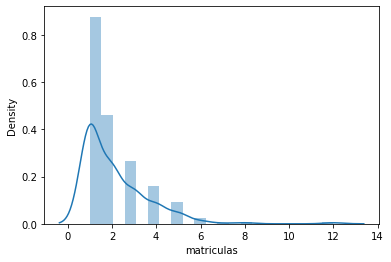

In [36]:
sns.distplot(nomes.matriculas)

In [37]:
nomes.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
8       2
12      2
7       1
Name: matriculas, dtype: int64

In [38]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
103,MAICON,295,@servicodoemail.com,maicon@servicodoemail.com,4
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,5
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,3
171,TERESINHA,45,@dominiodoemail.com.br,teresinha@dominiodoemail.com.br,1
41,CLAUDIO,204,@servicodoemail.com,claudio@servicodoemail.com,1


## Selecionando Cursos

In [39]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
97,BARBARA,201,@servicodoemail.com,barbara@servicodoemail.com,2
170,ALEXANDRO,341,@servicodoemail.com,alexandro@servicodoemail.com,4
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,5
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,4
138,NEUSA,75,@dominiodoemail.com.br,neusa@dominiodoemail.com.br,1


In [40]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [41]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
        
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])    

In [42]:
matriculas.head()

,id_aluno,id_curso
0,235,5
1,43,15
2,304,5
3,304,10
4,304,11


In [43]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,58,Lógica de programação
1,31,Java para Web
2,53,C# para Web
3,4,Ruby on Rails
4,12,Cursos de Python
5,74,PHP com MySql
6,32,.NET para web
7,18,Novas integrações com Java
8,59,TDD com Java


In [44]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
142,HUGO,378,@servicodoemail.com,hugo@servicodoemail.com,1
150,EDMILSON,326,@dominiodoemail.com.br,edmilson@dominiodoemail.com.br,1
161,DAMIAO,349,@servicodoemail.com,damiao@servicodoemail.com,4
163,REGIANE,308,@dominiodoemail.com.br,regiane@dominiodoemail.com.br,5
87,JONAS,120,@dominiodoemail.com.br,jonas@dominiodoemail.com.br,3


In [45]:
cursos.head(5)

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [46]:
matriculas.head(5)

,id_aluno,id_curso
0,235,5
1,43,15
2,304,5
3,304,10
4,304,11


In [47]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno':'quantidade_de_alunos'})

In [48]:
matriculas_por_curso.head(10)

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,58,Lógica de programação
1,31,Java para Web
2,53,C# para Web
3,4,Ruby on Rails
4,12,Cursos de Python
5,74,PHP com MySql
6,32,.NET para web
7,18,Novas integrações com Java
8,59,TDD com Java


## Saída em diferentes formatos

In [49]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,58,Lógica de programação
1,31,Java para Web
2,53,C# para Web


In [50]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [51]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,58,Lógica de programação
1,31,Java para Web
2,53,C# para Web
3,4,Ruby on Rails
4,12,Cursos de Python
5,74,PHP com MySql
6,32,.NET para web
7,18,Novas integrações com Java
8,59,TDD com Java
9,39,Código limpo com C#


In [52]:
matriculas_json = matriculas_por_curso.to_json()

In [53]:
matriculas_json

'{"quantidade_de_alunos":{"0":58,"1":31,"2":53,"3":4,"4":12,"5":74,"6":32,"7":18,"8":59,"9":39,"10":61,"11":65,"12":14,"13":27,"14":46,"15":43,"16":56,"17":53,"18":74,"19":35},"nome_do_curso":{"0":"L\\u00f3gica de programa\\u00e7\\u00e3o","1":"Java para Web","2":"C# para Web","3":"Ruby on Rails","4":"Cursos de Python","5":"PHP com MySql","6":".NET para web","7":"Novas integra\\u00e7\\u00f5es com Java","8":"TDD com Java","9":"C\\u00f3digo limpo com C#","10":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","11":"Hardware b\\u00e1sico","12":"Persist\\u00eancia com .NET","13":"Desenvolvendo jogos","14":"An\\u00e1lise de dados","15":"Estat\\u00edstica b\\u00e1sica","16":"Internet das coisas","17":"Programa\\u00e7\\u00e3o funcional","18":"Boas pr\\u00e1ticas em Java","19":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [54]:
matriculas_html = matriculas_por_curso.to_html()

In [55]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>58</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>1</th>
      <td>31</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>2</th>
      <td>53</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>4</th>
      <td>12</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>5</th>
      <td>74</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>6</th>
      <td>32</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>7</th>
      <td>18</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>8</th>
      <td>59</td>
 

## Criando o Banco SQL

In [56]:
!pip install sqlalchemy

In [57]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [58]:
engine = create_engine('sqlite:///:memory:')

In [59]:
engine

Engine(sqlite:///:memory:)

In [60]:
type(engine)

sqlalchemy.engine.base.Engine

In [61]:
matriculas_por_curso.to_sql('matriculas', engine)

In [62]:
inspector = inspect(engine) #criando um inspector object

In [63]:
print(inspector.get_table_names()) ## Exibindo as tabelas com o inspecto

['matriculas']


## Buscando do Banco SQL

In [64]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [65]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,3,4,Ruby on Rails
1,4,12,Cursos de Python
2,7,18,Novas integrações com Java
3,12,14,Persistência com .NET


In [66]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,58
1,Java para Web,31
2,C# para Web,53
3,Ruby on Rails,4
4,Cursos de Python,12
5,PHP com MySql,74
6,.NET para web,32
7,Novas integrações com Java,18
8,TDD com Java,59
9,Código limpo com C#,39


In [67]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,58
1,Java para Web,31
2,C# para Web,53
3,Ruby on Rails,4
4,Cursos de Python,12
5,PHP com MySql,74
6,.NET para web,32
7,Novas integrações com Java,18
8,TDD com Java,59
9,Código limpo com C#,39


In [68]:
muitas_matriculas.query('quantidade_de_alunos > 70')

,nome_do_curso,quantidade_de_alunos
5,PHP com MySql,74
18,Boas práticas em Java,74


In [69]:
 muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')

In [70]:
 muitas_matriculas

,nome_do_curso,quantidade_de_alunos
5,PHP com MySql,74
18,Boas práticas em Java,74


## Escrevendo no Banco

In [71]:
 muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [74]:
print(inspect(engine).get_table_names()) 

['matriculas', 'muitas_matriculas']


## Nomes dos alunos e alunas da próxima turma

In [77]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,58,Lógica de programação
1,31,Java para Web
2,53,C# para Web
3,4,Ruby on Rails
4,12,Cursos de Python
5,74,PHP com MySql
6,32,.NET para web
7,18,Novas integrações com Java
8,59,TDD com Java


In [78]:
matriculas

,id_aluno,id_curso
0,235,5
1,43,15
2,304,5
3,304,10
4,304,11
...,...,...
849,323,9
850,323,2
851,383,5
852,366,2


In [79]:
id_curso = 15

In [80]:
proxima_turma = matriculas.query(f"id_curso == {id_curso}")

In [82]:
proxima_turma.head()

,id_aluno,id_curso
1,43,15
6,304,15
13,310,15
23,218,15
44,10,15


In [85]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
166,KELLY,109,@dominiodoemail.com.br,kelly@dominiodoemail.com.br,3
66,DANILO,348,@dominiodoemail.com.br,danilo@dominiodoemail.com.br,3
98,GILSON,134,@dominiodoemail.com.br,gilson@dominiodoemail.com.br,2


In [87]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
10,15,MARIANA,@servicodoemail.com,mariana@servicodoemail.com,4
15,15,VAGNER,@servicodoemail.com,vagner@servicodoemail.com,4
15,15,VAGNER,@servicodoemail.com,vagner@servicodoemail.com,4
17,15,WILLIAN,@servicodoemail.com,willian@servicodoemail.com,1
25,15,DANIELE,@dominiodoemail.com.br,daniele@dominiodoemail.com.br,2
38,15,ISADORA,@dominiodoemail.com.br,isadora@dominiodoemail.com.br,8
41,15,WILSON,@dominiodoemail.com.br,wilson@dominiodoemail.com.br,1
43,15,ANA,@servicodoemail.com,ana@servicodoemail.com,1
54,15,MARGARIDA,@dominiodoemail.com.br,margarida@dominiodoemail.com.br,5


In [88]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
10       MARIANA
15        VAGNER
15        VAGNER
17       WILLIAN
25       DANIELE
38       ISADORA
41        WILSON
43           ANA
54     MARGARIDA
57       EDILSON
58      NATANAEL
64      HENRIQUE
81        INGRID
85        ANGELO
97         ELTON
101       MANOEL
112         EDER
115       SILVIA
117        HELIO
133      RODRIGO
148        THAIS
160         LARA
169       GERSON
176      GIOVANA
198       CICERO
203      TATIANE
210        JULIO
218       CAMILA
228        ERICA
230       CARLOS
236     LEONARDO
238    APARECIDA
244    VANDERLEI
251        MAURO
277        CLARA
298       GISELE
304    FRANCISCA
308      REGIANE
310      JULIANA
331         JOSE
335     DENILSON
341    ALEXANDRO
372       ELIANA
Name: nome, dtype: object

In [89]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
10,MARIANA
15,VAGNER
15,VAGNER
17,WILLIAN
25,DANIELE
38,ISADORA
41,WILSON
43,ANA
54,MARGARIDA


In [90]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
id                               16
Name: 15, dtype: object

In [91]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [92]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [93]:
proxima_turma

,nome
id_aluno,
10,MARIANA
15,VAGNER
15,VAGNER
17,WILLIAN
25,DANIELE
38,ISADORA
41,WILSON
43,ANA
54,MARGARIDA


In [94]:
proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

,Alunos do curso de Estatística básica
id_aluno,
10,MARIANA
15,VAGNER
15,VAGNER
17,WILLIAN
25,DANIELE
38,ISADORA
41,WILSON
43,ANA
54,MARGARIDA


In [95]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

In [97]:
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
id_aluno,
308,REGIANE
97,ELTON
341,ALEXANDRO
228,ERICA
64,HENRIQUE


## Excel

In [98]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [99]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,MARIANA
1,VAGNER
2,VAGNER
3,WILLIAN
4,DANIELE
5,ISADORA
6,WILSON
7,ANA
8,MARGARIDA
9,EDILSON
